2016-05-03 11:04:33,020 - modeltools.grid._grid -   DEBUG: Initialized P-grid using projection +proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere
2016-05-03 11:04:33,021 - modeltools.grid._grid -   DEBUG: Lower left corner lon/lat of grid: (-89.5,45.5)
2016-05-03 11:04:33,021 - modeltools.grid._grid -   DEBUG: Grid spacing in projection coords: (5.5e+03,5.5e+03)
2016-05-03 11:04:33,022 - modeltools.grid._grid -   DEBUG: Number of grid Nodes in x/y      : ( 1350, 1150)
2016-05-03 11:04:33,022 - modeltools.grid._grid -   DEBUG: Min   x projection coordinate = -3.63e+06
2016-05-03 11:04:33,023 - modeltools.grid._grid -   DEBUG: Max   x projection coordinate = 3.8e+06
2016-05-03 11:04:33,024 - modeltools.grid._grid -   DEBUG: Min   y projection coordinate = -3.7e+06
2016-05-03 11:04:33,024 - modeltools.grid._grid -   DEBUG: Max   y projection coordinate = 2.64e+06
2016-05-03 11:04:33,027 - modeltools.grid._grid -   DEBUG: Min lon = -180
2016-05-03 11:04:33,030 - modeltools.grid._gr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


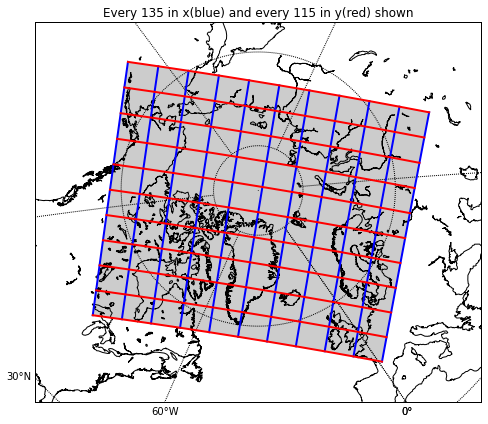

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
import abfile
import numpy

bathy_threshold=-5.
grid1=modeltools.grid.Proj4Grid("+proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere",
                              -89.5,45.5,5500,5500,1350,1150)
figure=grid1.plotgrid(1.5)
matplotlib.pyplot.show()
tmpdict=modeltools.grid.create_datadict_hycom(grid1)
abfile.write_regional_grid(tmpdict)



In [4]:
from mpl_toolkits.basemap import Basemap
#gebco = modeltools.bathy.GEBCO2014("/Users/knutal/Bathymetry/GEBCO/GEBCO_2014_2D.nc")
gebco = modeltools.bathy.GEBCO2014("/work/shared/nersc/msc/ModelInput/bathymetry/GEBCO_2014/GEBCO_2014_2D_median8km.nc")

lon,lat=grid1.pgrid()

w2=gebco.regrid(lon,lat,width=grid1.dx)
w2=numpy.ma.masked_where(w2>=bathy_threshold,w2)





def plot_map(ax,m,lon,lat,w2) :
    x,y=m(lon,lat)
    P=m.pcolormesh(x,y,w2,ax=ax)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    m.drawcoastlines()
    m.drawmapboundary() # draw a line around the map region
    m.drawparallels(numpy.arange(-90.,120.,10.),labels=[1,0,0,0],ax=ax) # draw parallels
    m.drawmeridians(numpy.arange(0.,420.,10.),labels=[0,0,0,1],ax=ax) # draw meridians
    ax.grid()
    return P

def plot_excerpt(lon,lat,w2) :

    figure = matplotlib.pyplot.figure(figsize=(20,20))
    ax=figure.add_subplot(221)
    P=matplotlib.pyplot.pcolormesh(w2)
    P.set_clim(-3000,0)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    ax.grid()

    ax=figure.add_subplot(222)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)



    ax=figure.add_subplot(223)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(224)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)

    matplotlib.pyplot.show()
    
plot_excerpt(lon,lat,w2)


AttributeError: 'module' object has no attribute 'bathy'

In [ ]:
w3=numpy.copy(w2)
w3=modeltools.bathy.shapiro_filter(w3)

print "PAss 1"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

print "PAss 2"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

w3=numpy.ma.masked_where(w3>=modeltools.bathy.default_threshold,w3)

plot_excerpt(lon,lat,w3)

In [ ]:
def plot_sidebyside(lon,lat,w2,w3) :

    figure = matplotlib.pyplot.figure(figsize=(15,40))

    ax=figure.add_subplot(521)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)
    
    ax=figure.add_subplot(522)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-3000,0)


    ax=figure.add_subplot(523)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(524)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-750,0)

    
    ax=figure.add_subplot(525)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-2000,0)
    
    ax=figure.add_subplot(526)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-2000,0)
    
    
    ax=figure.add_subplot(527)
    m = Basemap(width=1500000,height=1500000,
                resolution='i',projection='stere',\
                lat_ts=75,lat_0=75,lon_0=-100)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(528)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(529)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=55,lat_0=55,lon_0=0)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-300,0)
    
    ax=figure.add_subplot(5,2,10)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-300,0)

    matplotlib.pyplot.show()
    
    
plot_sidebyside(lon,lat,w2,w3)

In [ ]:
modeltools.hycom.io.write_bathymetry("TP5a0.05",1,-w3,-modeltools.bathy.default_threshold)


In [ ]:
tmp=modeltools.hycom.io.ABFileBathy("depth_TP5a0.05_01","r",w3.shape[1],w3.shape[0])
w4=tmp.readfield("depth")
w4=numpy.ma.masked_where(w4> modeltools.hycom.io.AFile._huge*.5,w4)
tmp.close()
figure = matplotlib.pyplot.figure(figsize=(10,10))
ax=figure.add_subplot(111)
P=matplotlib.pyplot.pcolormesh(w4)
#P.set_clim(0,3000)
ax = P.get_axes()
ax.set_axis_bgcolor('.5')
ax.grid()
